In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import re
import matplotlib.pyplot as plt

# Flux-z and image data

In [2]:
photozdata = pd.read_csv('/data/HSC/HSC_IMAGES_FIXED/HSC_photozdata_full_header_trimmed.csv')
spectro_z = np.asarray(photozdata["specz_redshift"])
col1 = np.asarray(photozdata["g_cmodel_mag"])
col2 = np.asarray(photozdata["r_cmodel_mag"])
col3 = np.asarray(photozdata["i_cmodel_mag"])
col4 =np.asarray(photozdata["z_cmodel_mag"])
col5 = np.asarray(photozdata["y_cmodel_mag"])
photodata = {'g_mag':col1,
             'r_mag':col2,
             'i_mag':col3,
             'z_mag':col4,
             'y_mag':col5,
             'zspec':spectro_z}
df = pd.DataFrame(photodata)
photozdata = df
photozdata.describe()

,g_mag,r_mag,i_mag,z_mag,y_mag,zspec
count,52591.000000,52591.000000,52591.000000,52591.000000,52591.000000,52591.000000
mean,23.326798,22.448803,21.766862,21.393757,21.201781,0.840776
std,1.285471,1.269242,1.287839,1.300397,1.318983,0.714068
min,16.535921,15.585190,15.075962,14.731529,14.492533,0.000004
25%,22.682315,21.867273,21.169539,20.777589,20.566622,0.543125
50%,23.380280,22.607754,21.925068,21.519438,21.324700,0.731400
75%,24.096104,23.184216,22.421049,22.069298,21.901840,0.946100
max,34.930744,27.396523,27.189955,27.018696,31.789879,9.999000


In [3]:
band_file_path = '/data/HSC/HSC_IMAGES_FIXED/'
g_band_files = os.listdir(os.path.join(band_file_path, 'g'))
image_nums = list(map(int, [re.sub('[^0-9]', '', filename) for filename in g_band_files]))

In [4]:
def plot_sed(galaxy_num):
    band_fluxes = photozdata.iloc[galaxy_num][0:5]
    z = photozdata.iloc[galaxy_num][5]
    ax = sns.lineplot(x=band_fluxes.index, y=band_fluxes)
    ax.set_title(f"Galaxy {galaxy_num}\nz = {z}")
    ax.set_ylabel("Flux [nJy]")
    ax.set_xlabel("Filter")
    ax.invert_yaxis()

In [9]:
cuts = np.arange(0, 5, 0.5)
filter_df = photozdata.iloc[image_nums]
binned_filter_df = filter_df.groupby(pd.cut(filter_df['zspec'], cuts))
filter_means = binned_filter_df.mean().drop('zspec', 1)
filter_devs = binned_filter_df.std().drop('zspec', 1)
filter_devs

,g_mag,r_mag,i_mag,z_mag,y_mag
zspec,,,,,
"(0.0, 0.5]",1.665924,1.711156,1.752813,1.769501,1.785571
"(0.5, 1.0]",1.000884,0.918642,0.943112,0.975112,1.000583
"(1.0, 1.5]",1.066981,0.949834,0.972120,0.997219,1.021294
"(1.5, 2.0]",1.080858,1.103655,1.248053,1.300389,1.301723
"(2.0, 2.5]",1.320520,1.353942,1.440674,1.486373,1.514561
"(2.5, 3.0]",1.255396,1.229896,1.318407,1.358949,1.363216
"(3.0, 3.5]",1.426491,1.359949,1.390926,1.482287,1.492301
"(3.5, 4.0]",1.124149,1.231958,1.349312,1.408950,1.437361
"(4.0, 4.5]",1.236088,1.293194,1.382405,1.404630,1.424576


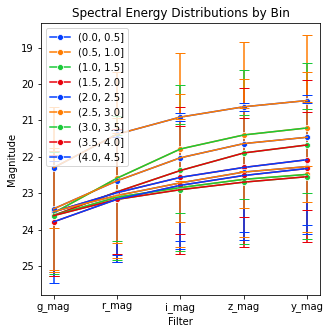

In [10]:
sns.set_palette(sns.color_palette("bright", 4))
plt.figure(figsize=(5,5))
plt.title("Spectral Energy Distributions by Bin")
plt.gca().invert_yaxis()
for i, bin_means in filter_means.iterrows():
    plt.xlabel('Filter')
    plt.ylabel('Magnitude')
    sns.lineplot(data=bin_means, marker='o', label=bin_means.name)
for i, bin_means in filter_means.iterrows():
    plt.errorbar(filter_devs.columns, bin_means, yerr=filter_devs.iloc[0], capsize=5)